In [117]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from shutil import copyfile
from skimage import exposure

import PIL as PIL




## Read the segy file and produce tiles in a numpy array


In [118]:
filename1 = 'data/Dutch Government_F3_entire_8bit seismic.segy'
seismic = segyio.tools.cube(filename1)

seismic.shape

(651, 951, 462)

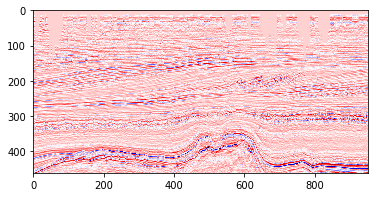

In [119]:

plt.imshow(seismic[300,:,:].T, cmap='seismic')

In [156]:
sizex = 28 # tile size 
sizey = 56 # tile size 

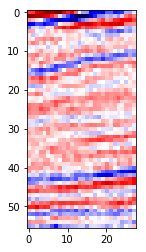

In [157]:
plt.imshow(seismic[300,200:200+sizex,200:200+sizey].T, cmap='seismic')

In [183]:
windows = np.zeros((seismic.shape[0],sizex,sizey)) # tiles a cross 

windows.shape

(651, 28, 56)

### xcross sections

In [196]:


j = 0

for i in range(0, seismic.shape[0]):
    for j in range(0, seismic.shape[1] - sizex , sizex):
        for k in range(0, seismic.shape[2] - sizey, sizey):
            windows[i,0:sizex,0:sizey] = seismic[i,j:j + sizex ,k:k + sizey]
            


windows.shape

(651, 28, 56)

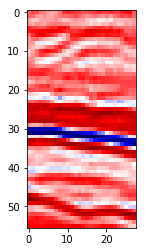

In [186]:
plt.imshow(windows[6,:,:].T,cmap='seismic')

### inline sections

In [190]:
windowsi = np.zeros((seismic.shape[1],sizex,sizey)) # tiles a cross 

windowsi.shape

(951, 28, 56)

In [193]:

for j in range(0, seismic.shape[1]):
    for i in range(0, seismic.shape[0] - sizex , sizex):
        for k in range(0, seismic.shape[2] - sizey, sizey):
            windowsi[i,0:sizex,0:sizey] = seismic[i:i+sizex,j ,k:k + sizey]
            


windowsi.shape

(951, 28, 56)

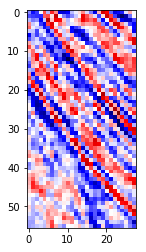

In [195]:
plt.imshow(windowsi[220,:,:].T,cmap='seismic')

### write the numpy array

In [197]:

chuncksno = 2
chuncks = windows.shape[2] // chuncksno


for i in range(0,chuncksno):
    np.save(f"seismic_input_to_autocoder{i}" ,windows[:,:,i*chuncks:i*chuncks+chuncks])


In [ ]:
chuncksno = 2
chuncks = windowsi.shape[2] // chuncksno


for i in range(0,chuncksno):
    np.save(f"seismic_input_to_autocoder{i+2}" ,windows[:,:,i*chuncks:i*chuncks+chuncks])

In [149]:
import scipy.interpolate as spint

RGI = spint.RegularGridInterpolator

x = np.linspace(0, 1, 3) #  or  0.5*np.arange(3.) works too

# populate the 3D array of values (re-using x because lazy)
X, Y, Z = np.meshgrid(x, x, x, indexing='ij')
vals = np.sin(X) + np.cos(Y) + np.tan(Z)

# make the interpolator, (list of 1D axes, values at all points)
rgi = RGI(points=[x, x, x], values=vals)  # can also be [x]*3 or (x,)*3

tst = (0.47, 0.49, 0.53)

rgi(tst)

array(1.93765972)

In [152]:
seismic.header

AttributeError: 'numpy.ndarray' object has no attribute 'header'